In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import csv


from sklearn.datasets import make_classification

In [2]:
def evaluation(Y_test, y_pred): 
    y_true, y_pred = np.array(Y_test), np.array(y_pred)
    mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    score = pd.DataFrame([mape, mae, mse], index=['mape', 'mae', 'mse'], columns=['score']).T
    return score

In [3]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)

In [4]:
data = pd.read_csv(r"./dataset.csv")
print(data.head())

  GENDER         NATION  OLD          SITE         SYMPTOM Parasite
0    MAN  UNITED STATES   24           NaN       CONFUSION      non
1    MAN      VENEZUELA   16  NEUROLOGICAL             NaN      non
2    MAN       THAILAND   23          SKIN             NaN      non
3  WOMAN          JAPAN   62        OCULAR          ATAXIA      non
4  WOMAN        JAMAICA   30        VISION  BLURRED VISION      non


In [5]:
data.info()
data.isnull().sum()# 문자전환



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GENDER    1698 non-null   object
 1   NATION    1698 non-null   object
 2   OLD       1698 non-null   int64 
 3   SITE      1439 non-null   object
 4   SYMPTOM   523 non-null    object
 5   Parasite  1698 non-null   object
dtypes: int64(1), object(5)
memory usage: 79.7+ KB


GENDER         0
NATION         0
OLD            0
SITE         259
SYMPTOM     1175
Parasite       0
dtype: int64

In [6]:
# 문자전환
data = data.replace(' ', '')

# 만약 결측치가 문자열 스페이스(' ')로 되어 있다면, np.nan으로 바꾸어 Pandas 라이브러리가 인식할수 있도록 변환
data = data.replace('', np.nan)

# 결측 row 제거하는 방법

data=data.dropna(how='any',thresh=1)

data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 0 to 1697
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GENDER    1698 non-null   object
 1   NATION    1698 non-null   object
 2   OLD       1698 non-null   int64 
 3   SITE      1439 non-null   object
 4   SYMPTOM   523 non-null    object
 5   Parasite  1698 non-null   object
dtypes: int64(1), object(5)
memory usage: 92.9+ KB


GENDER         0
NATION         0
OLD            0
SITE         259
SYMPTOM     1175
Parasite       0
dtype: int64

In [7]:
category_list = ['GENDER','NATION','OLD','SITE','SYMPTOM','Parasite']


In [8]:
# categorize
categories_encoded = pd.DataFrame()
cate_cols = []


for x in category_list:

    print(x)
    X = data[x]
    x_encoded, x_categories = X.factorize()

    # dataframe
    temp_df = pd.DataFrame(x_encoded)
    categories_encoded = pd.concat([categories_encoded,temp_df],axis=1)

    # 컬럼명 추가
    col_names=x.upper()
    cate_cols.append(col_names)
 

    # 컬럼명 수정
categories_encoded.columns = [cate_cols]
print(categories_encoded)

GENDER
NATION
OLD
SITE
SYMPTOM
Parasite
     GENDER NATION OLD SITE SYMPTOM PARASITE
0         0      0   0   -1       0        0
1         0      1   1    0      -1        0
2         0      2   2    1      -1        0
3         1      3   3    2       1        0
4         1      4   4    3       2        0
...     ...    ...  ..  ...     ...      ...
1693      1     87  14   -1      13        0
1694      0     86  26    1       8        0
1695      1     91  14    0      40        0
1696      0     79  66    1       4        0
1697      0     87  17   13      -1        0

[1698 rows x 6 columns]


In [9]:
final_df = pd.concat([categories_encoded],axis=1)
print(final_df)

     GENDER NATION OLD SITE SYMPTOM PARASITE
0         0      0   0   -1       0        0
1         0      1   1    0      -1        0
2         0      2   2    1      -1        0
3         1      3   3    2       1        0
4         1      4   4    3       2        0
...     ...    ...  ..  ...     ...      ...
1693      1     87  14   -1      13        0
1694      0     86  26    1       8        0
1695      1     91  14    0      40        0
1696      0     79  66    1       4        0
1697      0     87  17   13      -1        0

[1698 rows x 6 columns]


In [10]:
#final_df=pd.DataFrame(imp.fit_transform(final_df))
final_df.info()
final_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (GENDER,)    1698 non-null   int64
 1   (NATION,)    1698 non-null   int64
 2   (OLD,)       1698 non-null   int64
 3   (SITE,)      1698 non-null   int64
 4   (SYMPTOM,)   1698 non-null   int64
 5   (PARASITE,)  1698 non-null   int64
dtypes: int64(6)
memory usage: 79.7 KB


GENDER      0
NATION      0
OLD         0
SITE        0
SYMPTOM     0
PARASITE    0
dtype: int64

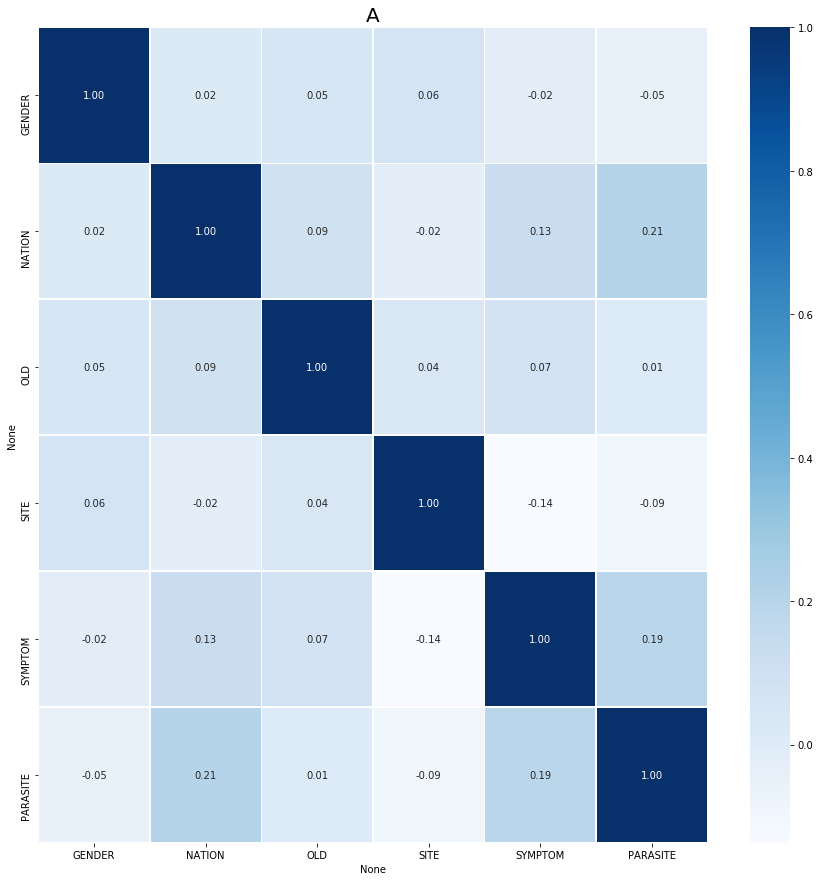

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#corrlation coeffecient
final_df[final_df.columns[:6]].corr()
plt.figure(figsize=(15,15))
plt.title('A',fontsize=20)
sns.heatmap(data = final_df[final_df.columns[:6]].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


In [12]:
#from sklearn.preprocessing import label_binarize
print(final_df[final_df.columns[:5]])
X=np.array(final_df[final_df.columns[:5]])
print(X)
Y=final_df[final_df.columns[5]]
print(Y)
Y=np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape
                                                    
print(Y_train)

     GENDER NATION OLD SITE SYMPTOM
0         0      0   0   -1       0
1         0      1   1    0      -1
2         0      2   2    1      -1
3         1      3   3    2       1
4         1      4   4    3       2
...     ...    ...  ..  ...     ...
1693      1     87  14   -1      13
1694      0     86  26    1       8
1695      1     91  14    0      40
1696      0     79  66    1       4
1697      0     87  17   13      -1

[1698 rows x 5 columns]
[[ 0  0  0 -1  0]
 [ 0  1  1  0 -1]
 [ 0  2  2  1 -1]
 ...
 [ 1 91 14  0 40]
 [ 0 79 66  1  4]
 [ 0 87 17 13 -1]]
0       0
1       0
2       0
3       0
4       0
       ..
1693    0
1694    0
1695    0
1696    0
1697    0
Name: (PARASITE,), Length: 1698, dtype: int64
[0 0 0 ... 0 0 0]


In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [14]:
from sklearn.metrics import roc_auc_score

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) 

정확도 : 0.7176470588235294
Model_Evaluation with Label:1
Accuracy:  0.7176470588235294
Precision:  0.1553398058252427
Recall:  0.64
F1-Score:  0.24999999999999997


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


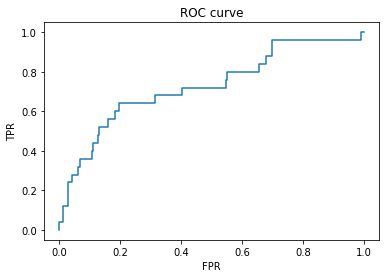

AUC: 0.7264761904761905


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import auc

#BalancedRandomForestClassifier
Brnd_clf = BalancedRandomForestClassifier(n_estimators =300, # 300번 추정
                                             max_depth =20 # 트리 최대 깊이 20
                                            )
Brnd_result=Brnd_clf.fit(X_train,Y_train)
Brnd_y_pred = Brnd_clf.predict(X_test)

    # 정확도 확인
print('정확도 :', accuracy_score(Y_test, Brnd_y_pred))
model_evaluation(Y_test,Brnd_y_pred)
evaluation(Y_test, Brnd_y_pred)

Brnd_clf_predictions =Brnd_clf.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, Brnd_clf_predictions[:,1])
auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Brnd_clf, X,Y, cv=10)
scores
scores.mean()

0.7265254853109104

In [17]:
from sklearn.metrics import classification_report
Brnd_clf_report = classification_report(
    
    y_true=Y_test, 
    y_pred=Brnd_y_pred)
print(Brnd_clf_report)

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       315
           1       0.16      0.64      0.25        25

    accuracy                           0.72       340
   macro avg       0.56      0.68      0.54       340
weighted avg       0.90      0.72      0.78       340



정확도 : 0.75
Model_Evaluation with Label:1
Accuracy:  0.75
Precision:  0.17391304347826086
Recall:  0.64
F1-Score:  0.27350427350427353


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


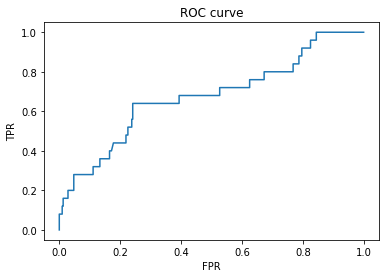

AUC: 0.6745396825396826


In [18]:
#RUSBoostClassifier
from sklearn.metrics import accuracy_score
from imblearn.ensemble import RUSBoostClassifier
from sklearn.datasets import make_classification

R_clf = RUSBoostClassifier(n_estimators = 300, # 300번 추정
                         random_state = 42)
R_result=R_clf.fit(X_train,Y_train)
R_clf_y_pred = R_clf.predict(X_test)

    # 정확도 확인
print('정확도 :', accuracy_score(Y_test, R_clf_y_pred))
model_evaluation(Y_test,R_clf_y_pred)
evaluation(Y_test, R_clf_y_pred)
R_clf_predictions =R_clf.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test,R_clf_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(R_clf, X,Y, cv=10)
scores
scores.mean()

0.7615158472815058

In [20]:
from sklearn.metrics import classification_report
R_clf_report = classification_report(
    digits=6,
    y_true=Y_test, 
    y_pred=R_clf_y_pred)
print(R_clf_report)

              precision    recall  f1-score   support

           0   0.963710  0.758730  0.849023       315
           1   0.173913  0.640000  0.273504        25

    accuracy                       0.750000       340
   macro avg   0.568811  0.699365  0.561264       340
weighted avg   0.905636  0.750000  0.806706       340



정확도 : 0.9029411764705882
Model_Evaluation with Label:1
Accuracy:  0.9029411764705882
Precision:  0.25
Recall:  0.16
F1-Score:  0.19512195121951217


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


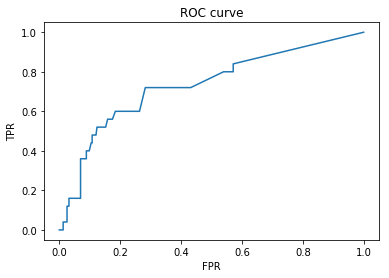

AUC: 0.7318095238095238


In [21]:
#RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators =100, # 300번 추정
                                             max_depth =100,
                                             random_state = 42)
rnd_result=rnd_clf.fit(X_train,Y_train)
rnd_y_pred = rnd_clf.predict(X_test)

    # 정확도 확인
print('정확도 :', accuracy_score(Y_test, rnd_y_pred))
model_evaluation(Y_test,rnd_y_pred)
evaluation(Y_test,rnd_y_pred)
rnd_clf_predictions =rnd_clf.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, rnd_clf_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf, X,Y, cv=10)
scores
scores.mean()

0.9057759376978238

In [23]:
from sklearn.metrics import classification_report
rnd_clf_report = classification_report(
    digits=6,
    y_true=Y_test, 
    y_pred=rnd_y_pred)
print(rnd_clf_report)

              precision    recall  f1-score   support

           0   0.935185  0.961905  0.948357       315
           1   0.250000  0.160000  0.195122        25

    accuracy                       0.902941       340
   macro avg   0.592593  0.560952  0.571739       340
weighted avg   0.884804  0.902941  0.892972       340



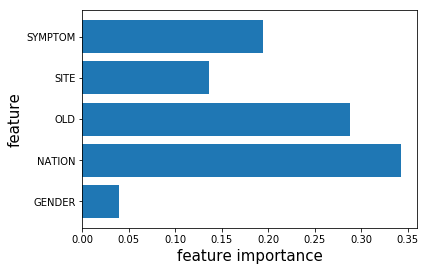

In [24]:
index = ['GENDER','NATION','OLD','SITE','SYMPTOM']
plt.barh(index, rnd_result.feature_importances_, align='center')
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

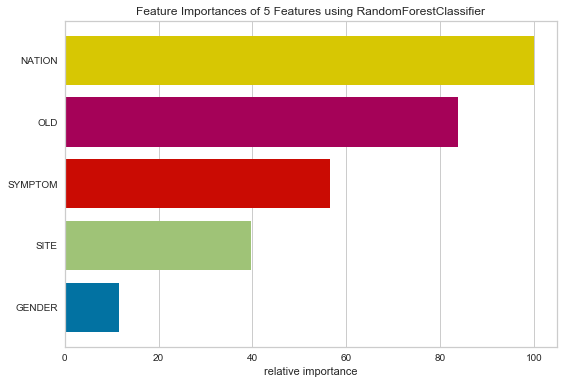

In [25]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(rnd_clf,labels=index)
viz.fit(X, Y)
viz.show()

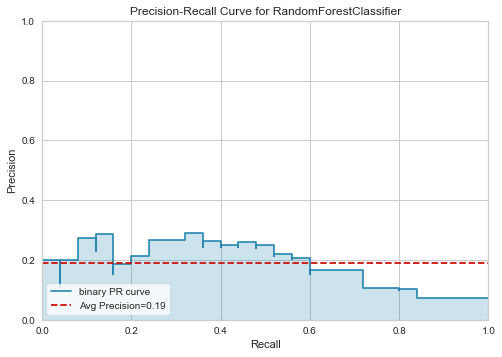

In [26]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(rnd_clf)
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

정확도 : 0.8970588235294118
Model_Evaluation with Label:1
Accuracy:  0.8970588235294118
Precision:  0.2727272727272727
Recall:  0.24
F1-Score:  0.2553191489361702


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


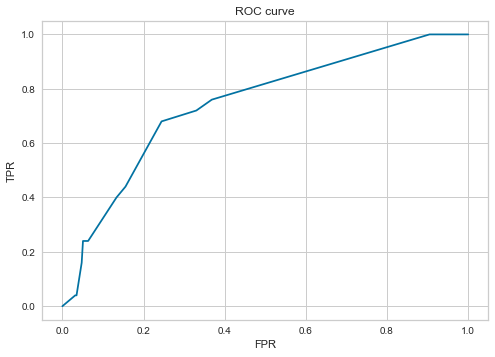

AUC: 0.7427301587301588


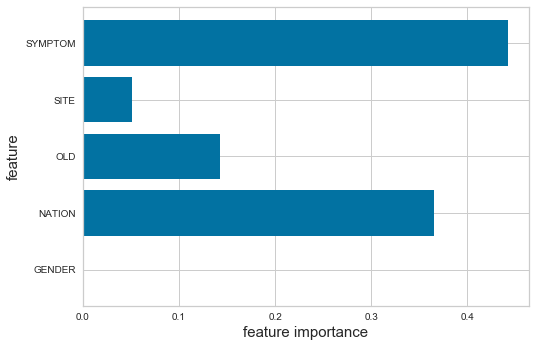

In [27]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', 
                                             max_depth =5, 
                                            ).fit(X_train, Y_train)
DTC_y_pred = DTC.predict(X_test)

    # 정확도 확인
print('정확도 :', accuracy_score(Y_test, DTC_y_pred))
model_evaluation(Y_test,DTC_y_pred)
evaluation(Y_test, DTC_y_pred)

DTC_predictions =DTC.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, DTC_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

plt.barh(index, DTC.feature_importances_, align='center')


plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DTC,X,Y, cv=10)
scores
scores.mean()


0.9128488060852911

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test, 
    y_pred=DTC_y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.940252  0.949206  0.944708       315
           1   0.272727  0.240000  0.255319        25

    accuracy                       0.897059       340
   macro avg   0.606489  0.594603  0.600013       340
weighted avg   0.891169  0.897059  0.894017       340



C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


정확도 : 0.9088235294117647
Model_Evaluation with Label:1
Accuracy:  0.9088235294117647
Precision:  0.2857142857142857
Recall:  0.16
F1-Score:  0.20512820512820512


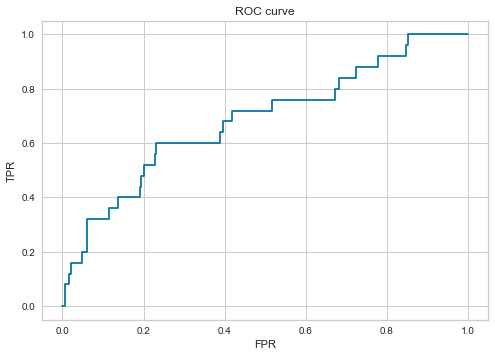

AUC: 0.685968253968254


In [30]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(300,100), max_iter=100, random_state =42)
MLP.fit(X_train, Y_train)
MLP_y_pred = MLP.predict(X_test)

    # 정확도 확인
print('정확도 :', accuracy_score(Y_test, MLP_y_pred))
model_evaluation(Y_test,MLP_y_pred)
evaluation(Y_test,MLP_y_pred)

MLP_predictions =MLP.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, MLP_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [31]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(MLP,X,Y, cv=10)
scores
scores.mean()

0.9157486214666497

In [32]:
print(classification_report(Y_test, MLP_y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.935583  0.968254  0.951638       315
           1   0.285714  0.160000  0.205128        25

    accuracy                       0.908824       340
   macro avg   0.610649  0.564127  0.578383       340
weighted avg   0.887798  0.908824  0.896748       340



C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


정확도 : 0.9147058823529411
Model_Evaluation with Label:1
Accuracy:  0.9147058823529411
Precision:  0.375
Recall:  0.24
F1-Score:  0.2926829268292683


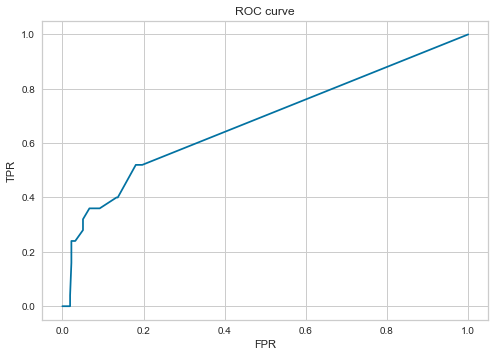

AUC: 0.6781587301587302


In [33]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier().fit(X_train, Y_train)
ETC_y_pred = ETC.predict(X_test)
print('정확도 :', accuracy_score(Y_test, ETC_y_pred))
model_evaluation(Y_test,ETC_y_pred)
evaluation(Y_test,ETC_y_pred)

ETC_predictions =ETC.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, ETC_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [34]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ETC,X,Y, cv=10)
scores.mean()

0.9140079139721913

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ETC_y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.941358  0.968254  0.954617       315
           1   0.375000  0.240000  0.292683        25

    accuracy                       0.914706       340
   macro avg   0.658179  0.604127  0.623650       340
weighted avg   0.899714  0.914706  0.905945       340



정확도 : 0.9117647058823529
Model_Evaluation with Label:1
Accuracy:  0.9117647058823529
Precision:  0.14285714285714285
Recall:  0.04
F1-Score:  0.0625


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


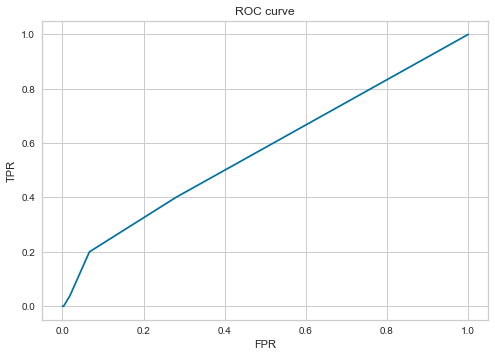

AUC: 0.5742857142857142


In [36]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier().fit(X_train, Y_train)
neigh_y_pred = neigh.predict(X_test)
print('정확도 :', accuracy_score(Y_test, neigh_y_pred))
model_evaluation(Y_test,neigh_y_pred)
evaluation(Y_test, neigh_y_pred)
knn_predictions =neigh.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, knn_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [37]:
k_range = range(1,100)
k_scores= []

for k in k_range:
    knn=KNeighborsClassifier(k)
    scores=cross_val_score(knn,X_train,Y_train,cv=5,scoring="accuracy")
    k_scores.append(scores.mean())

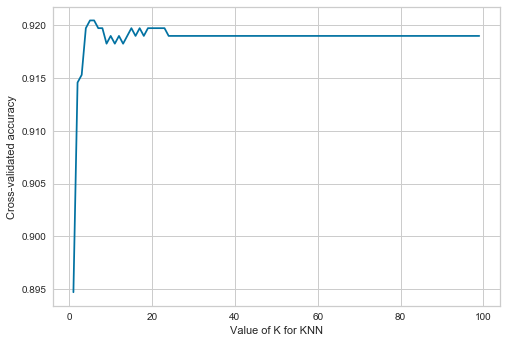

In [38]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [39]:
scores=cross_val_score(neigh,X,Y, cv=10)
scores.mean()

0.9122364095643446

In [40]:
print(classification_report(Y_test, neigh.predict(X_test),digits=6))

              precision    recall  f1-score   support

           0   0.927928  0.980952  0.953704       315
           1   0.142857  0.040000  0.062500        25

    accuracy                       0.911765       340
   macro avg   0.535393  0.510476  0.508102       340
weighted avg   0.870202  0.911765  0.888174       340



정확도 : 0.9029411764705882
Model_Evaluation with Label:1
Accuracy:  0.9029411764705882
Precision:  0.25
Recall:  0.16
F1-Score:  0.19512195121951217


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


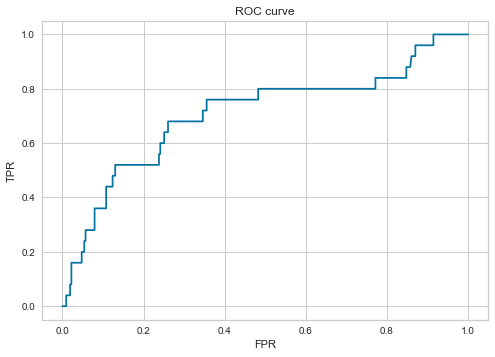

AUC: 0.708126984126984


In [41]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = tree_model).fit(X_train, Y_train)

ada_y_pred = ada.predict(X_test)
print('정확도 :', accuracy_score(Y_test, ada_y_pred))
model_evaluation(Y_test,ada_y_pred)
evaluation(Y_test, ada_y_pred)
ada_predictions =ada.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, ada_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [42]:
scores=cross_val_score(ada,X,Y, cv=10)
scores.mean()

0.9057897790072117

In [43]:
print(classification_report(Y_test, ada.predict(X_test),digits=6))

              precision    recall  f1-score   support

           0   0.935185  0.961905  0.948357       315
           1   0.250000  0.160000  0.195122        25

    accuracy                       0.902941       340
   macro avg   0.592593  0.560952  0.571739       340
weighted avg   0.884804  0.902941  0.892972       340



정확도 : 0.8970588235294118
Model_Evaluation with Label:1
Accuracy:  0.8970588235294118
Precision:  0.2727272727272727
Recall:  0.24
F1-Score:  0.2553191489361702


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


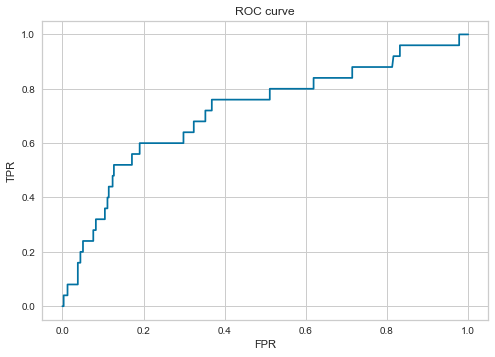

AUC: 0.7160000000000001


In [44]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=10, n_estimators=300).fit(X_train, Y_train)
gb_y_pred = gb.predict(X_test)
print('정확도 :', accuracy_score(Y_test, gb_y_pred))
model_evaluation(Y_test,gb_y_pred)
evaluation(Y_test, gb_y_pred)
gb_predictions =gb.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, gb_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [45]:
scores=cross_val_score(gb,X,Y, cv=10)
scores.mean()

0.9145961492663088

C:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


정확도 : 0.9176470588235294
Model_Evaluation with Label:1
Accuracy:  0.9176470588235294
Precision:  0.38461538461538464
Recall:  0.2
F1-Score:  0.2631578947368421


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


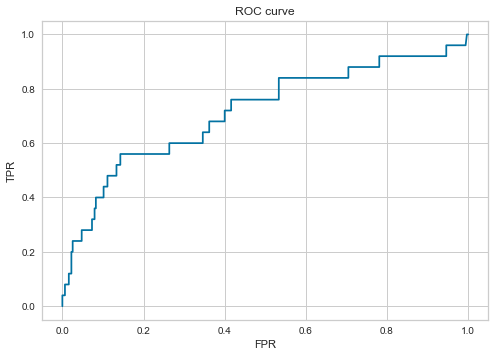

AUC: 0.7142222222222222


In [46]:
#XGBClassifier
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier().fit(X_train, Y_train)
xgb_y_pred = xgb.predict(X_test)
print('정확도 :', accuracy_score(Y_test, xgb_y_pred))
model_evaluation(Y_test, xgb_y_pred)
evaluation(Y_test, xgb_y_pred)
xgb_predictions =xgb.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, xgb_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [47]:
scores=cross_val_score(xgb,X,Y, cv=10)
scores.mean()

0.9140113539446713

정확도 : 0.9205882352941176
Model_Evaluation with Label:1
Accuracy:  0.9205882352941176
Precision:  0.4166666666666667
Recall:  0.2
F1-Score:  0.2702702702702703


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


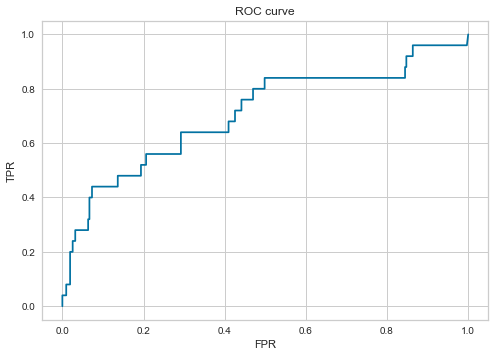

AUC: 0.7074920634920635


In [48]:
#LGBMClassifier()
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier().fit(X_train, Y_train)
lgbm_y_pred = lgbm.predict(X_test)
print('정확도 :', accuracy_score(Y_test, lgbm_y_pred))
model_evaluation(Y_test, lgbm_y_pred)
evaluation(Y_test, lgbm_y_pred)
lgbm_predictions =lgbm.predict_proba(X_test)
#print(predictions)
#print (roc_auc_score(Y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(Y_test, lgbm_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [49]:
scores=cross_val_score(lgbm,X,Y, cv=10)
scores.mean()

0.9093053901722632

Learning rate set to 0.01174
0:	learn: 0.6791532	total: 56.4ms	remaining: 56.4s
1:	learn: 0.6654787	total: 58.9ms	remaining: 29.4s
2:	learn: 0.6514133	total: 61.3ms	remaining: 20.4s
3:	learn: 0.6384985	total: 63.7ms	remaining: 15.9s
4:	learn: 0.6272725	total: 66ms	remaining: 13.1s
5:	learn: 0.6146405	total: 68.3ms	remaining: 11.3s
6:	learn: 0.6029800	total: 70.6ms	remaining: 10s
7:	learn: 0.5916358	total: 72.9ms	remaining: 9.04s
8:	learn: 0.5811193	total: 75.3ms	remaining: 8.29s
9:	learn: 0.5712425	total: 77ms	remaining: 7.62s
10:	learn: 0.5610256	total: 79.4ms	remaining: 7.14s
11:	learn: 0.5510340	total: 82.1ms	remaining: 6.76s
12:	learn: 0.5407530	total: 84ms	remaining: 6.38s
13:	learn: 0.5319397	total: 85.9ms	remaining: 6.05s
14:	learn: 0.5236450	total: 88.3ms	remaining: 5.8s
15:	learn: 0.5150820	total: 90.6ms	remaining: 5.57s
16:	learn: 0.5064423	total: 93.1ms	remaining: 5.38s
17:	learn: 0.4984049	total: 95.4ms	remaining: 5.21s
18:	learn: 0.4902892	total: 97.8ms	remaining: 5.05s
19

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


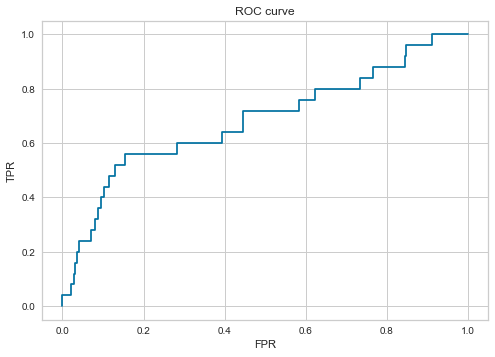

AUC: 0.6853333333333333


In [50]:
#CatBoostClassifier
from catboost import CatBoostClassifier
cbm = CatBoostClassifier().fit(X_train, Y_train)
cbm_y_pred = cbm.predict(X_test)
print('정확도 :', accuracy_score(Y_test, cbm_y_pred))
model_evaluation(Y_test, cbm_y_pred)
evaluation(Y_test, cbm_y_pred)
cb_predictions =cbm.predict_proba(X_test)
#print(predictions)
#print (roc_auc_score(Y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(Y_test, cb_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [51]:
scores=cross_val_score(cbm,X,Y, cv=10)
scores.mean()

Learning rate set to 0.012343
0:	learn: 0.6782653	total: 12.9ms	remaining: 12.9s
1:	learn: 0.6642691	total: 31ms	remaining: 15.5s
2:	learn: 0.6500543	total: 42.2ms	remaining: 14s
3:	learn: 0.6367665	total: 52ms	remaining: 13s
4:	learn: 0.6249519	total: 69.5ms	remaining: 13.8s
5:	learn: 0.6120004	total: 77.6ms	remaining: 12.8s
6:	learn: 0.6000505	total: 86.1ms	remaining: 12.2s
7:	learn: 0.5883425	total: 95.2ms	remaining: 11.8s
8:	learn: 0.5768270	total: 107ms	remaining: 11.7s
9:	learn: 0.5665944	total: 113ms	remaining: 11.1s
10:	learn: 0.5563771	total: 120ms	remaining: 10.8s
11:	learn: 0.5465908	total: 128ms	remaining: 10.6s
12:	learn: 0.5365428	total: 135ms	remaining: 10.3s
13:	learn: 0.5279258	total: 144ms	remaining: 10.1s
14:	learn: 0.5189321	total: 152ms	remaining: 9.97s
15:	learn: 0.5103148	total: 160ms	remaining: 9.85s
16:	learn: 0.5017816	total: 170ms	remaining: 9.82s
17:	learn: 0.4946396	total: 178ms	remaining: 9.74s
18:	learn: 0.4863170	total: 192ms	remaining: 9.93s
19:	learn: 

0.9193091965323449

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


정확도 : 0.9264705882352942
Model_Evaluation with Label:1
Accuracy:  0.9264705882352942
Precision:  0.5
Recall:  0.08
F1-Score:  0.13793103448275865


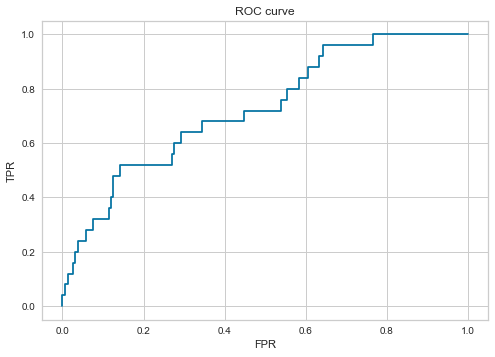

AUC: 0.727111111111111


In [52]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( ).fit(X_train, Y_train)

lr_y_pred = lr.predict(X_test)
print('정확도 :', accuracy_score(Y_test, lr_y_pred))
model_evaluation(Y_test, lr_y_pred)
evaluation(Y_test, lr_y_pred)
lr_predictions =lr.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, lr_predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [53]:
scores=cross_val_score(lr,X,Y, cv=10)
scores.mean()

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

0.9181361659165898

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


정확도 : 0.9147058823529411
Model_Evaluation with Label:1
Accuracy:  0.9147058823529411
Precision:  0.0
Recall:  0.0
F1-Score:  nan


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


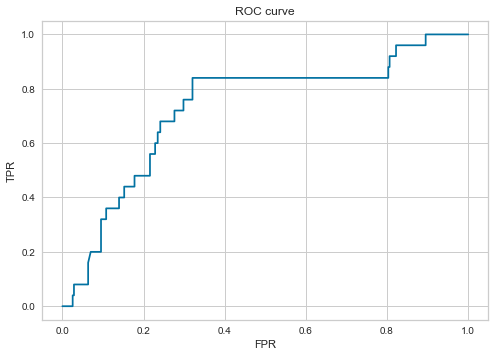

AUC: 0.7283809523809524


In [54]:
#SVM
from sklearn.svm import SVC
svm = SVC().fit(X_train,Y_train)

svm_y_pred =svm.predict(X_test)
print('정확도 :', accuracy_score(Y_test, svm_y_pred))
model_evaluation(Y_test, svm_y_pred)
evaluation(Y_test, svm_y_pred)
svm_predictions =svm.decision_function(X_test)


fpr, tpr, _ = roc_curve(Y_test, svm_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print('AUC:', auc(fpr, tpr))

In [55]:
scores=cross_val_score(svm,X,Y, cv=10)
scores.mean()

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

0.914035678010434

In [56]:
from yellowbrick.classifier import roc_auc

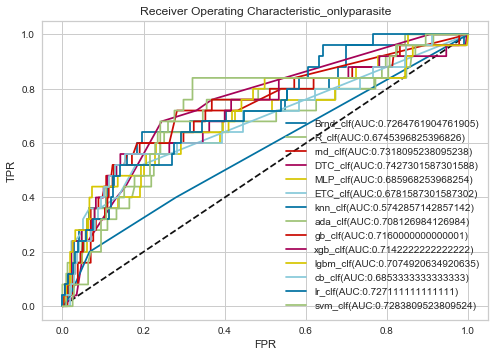

In [58]:
from sklearn.metrics import roc_curve

fpr1 , tpr1, thresholds1 = roc_curve(Y_test, Brnd_clf_predictions[:,1])
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, R_clf_predictions[:,1])
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, rnd_clf_predictions[:,1])
fpr4 , tpr4, thresholds4 = roc_curve(Y_test, DTC_predictions[:,1])
fpr5 , tpr5, thresholds5 = roc_curve(Y_test, MLP_predictions[:,1])
fpr6 , tpr6, thresholds6 = roc_curve(Y_test, ETC_predictions[:,1])
fpr7 , tpr7, thresholds7 = roc_curve(Y_test, knn_predictions[:,1])
fpr8 , tpr8, thresholds8 = roc_curve(Y_test, ada_predictions[:,1])
fpr9 , tpr9, thresholds9 = roc_curve(Y_test, gb_predictions[:,1])
fpr10 , tpr10, thresholds10 = roc_curve(Y_test, xgb_predictions[:,1])
fpr11 , tpr11, thresholds11 = roc_curve(Y_test, lgbm_predictions[:,1])
fpr12 , tpr12, thresholds12 = roc_curve(Y_test, cb_predictions[:,1])
fpr13 , tpr13, thresholds13 = roc_curve(Y_test, lr_predictions[:,1])
fpr14 , tpr14, thresholds14 = roc_curve(Y_test, svm_predictions)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Brnd_clf"+"(AUC:"+str(auc(fpr1,tpr1))+")")
plt.plot(fpr2, tpr2, label= "R_clf"+"(AUC:"+str(auc(fpr2,tpr2))+")")
plt.plot(fpr3, tpr3, label= "rnd_clf"+"(AUC:"+str(auc(fpr3,tpr3))+")")
plt.plot(fpr4, tpr4, label= "DTC_clf"+"(AUC:"+str(auc(fpr4,tpr4))+")")
plt.plot(fpr5, tpr5, label= "MLP_clf"+"(AUC:"+str(auc(fpr5,tpr5))+")")
plt.plot(fpr6, tpr6, label= "ETC_clf"+"(AUC:"+str(auc(fpr6,tpr6))+")")
plt.plot(fpr7, tpr7, label= "knn_clf"+"(AUC:"+str(auc(fpr7,tpr7))+")")
plt.plot(fpr8, tpr8, label= "ada_clf"+"(AUC:"+str(auc(fpr8,tpr8))+")")
plt.plot(fpr9, tpr9, label= "gb_clf"+"(AUC:"+str(auc(fpr9,tpr9))+")")
plt.plot(fpr10, tpr10, label= "xgb_clf"+"(AUC:"+str(auc(fpr10,tpr10))+")")
plt.plot(fpr11, tpr11, label= "lgbm_clf"+"(AUC:"+str(auc(fpr11,tpr11))+")")
plt.plot(fpr12, tpr12, label= "cb_clf"+"(AUC:"+str(auc(fpr12,tpr12))+")")
plt.plot(fpr13, tpr13, label= "lr_clf"+"(AUC:"+str(auc(fpr13,tpr13))+")")
plt.plot(fpr14, tpr14, label= "svm_clf"+"(AUC:"+str(auc(fpr14,tpr14))+")")


plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic_onlyparasite')
plt.show()

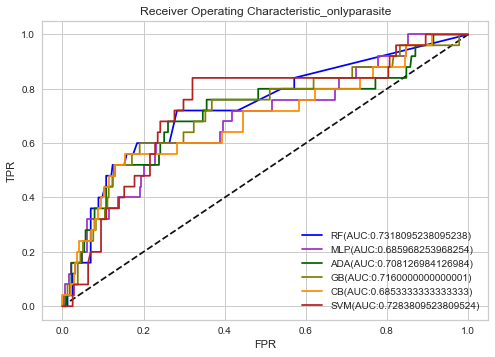

In [63]:
#non sampling
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, rnd_clf_predictions[:,1])
fpr5 , tpr5, thresholds5 = roc_curve(Y_test, MLP_predictions[:,1])
fpr8 , tpr8, thresholds8 = roc_curve(Y_test, ada_predictions[:,1])
fpr9 , tpr9, thresholds9 = roc_curve(Y_test, gb_predictions[:,1])
fpr12 , tpr12, thresholds12 = roc_curve(Y_test, cb_predictions[:,1])
fpr14 , tpr14, thresholds14 = roc_curve(Y_test, svm_predictions)

plt.plot([0,1],[0,1], 'k--')

#non sampling
plt.plot(fpr3, tpr3, label= "RF"+"(AUC:"+str(auc(fpr3,tpr3))+")", c="blue")
plt.plot(fpr5, tpr5, label= "MLP"+"(AUC:"+str(auc(fpr5,tpr5))+")", c="darkorchid")
plt.plot(fpr8, tpr8, label= "ADA"+"(AUC:"+str(auc(fpr8,tpr8))+")", c="darkgreen")
plt.plot(fpr9, tpr9, label= "GB"+"(AUC:"+str(auc(fpr9,tpr9))+")", c="olive")
plt.plot(fpr12, tpr12, label= "CB"+"(AUC:"+str(auc(fpr12,tpr12))+")", c="darkorange")
plt.plot(fpr14, tpr14, label= "SVM"+"(AUC:"+str(auc(fpr14,tpr14))+")", c="firebrick")


plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic_onlyparasite')
plt.show()